In [113]:
import pandas as pd
import geopandas as gpd
import json
import os
import folium
import numpy as np

In [114]:
# Step 2: Load the GeoJSON file as a GeoDataFrame
taz_gdf = gpd.read_file('data/WFv900_TAZ.geojson')
taz_dsml_acres_df = taz_gdf[['TAZID','DISTSML','DSML_NAME','ACRES','DEVACRES']]
taz_dsml_acres_df

,TAZID,DISTSML,DSML_NAME,ACRES,DEVACRES
0,1,11,Small District 011,582.086695,582.086695
1,2,11,Small District 011,135.465050,134.110399
2,3,11,Small District 011,663.377323,636.842231
3,4,11,Small District 011,375.207672,371.455595
4,5,11,Small District 011,1031.463233,1021.148600
...,...,...,...,...,...
3541,3506,681,Small District 681,329.216986,55.966888
3542,3508,681,Small District 681,3449.109810,1207.188434
3543,3504,681,Small District 681,1203.759358,0.000000
3544,3546,903,Small District 903,59358.376922,0.000000


In [115]:
_df1 = pd.read_csv('data/SE_2023.csv')
_df1['scenario'] = 'oy-2023'
_df2 = pd.read_csv('data/SE_2050.csv')
_df2['scenario'] = 'rtp-2050'

se_df = pd.concat([_df1, _df2])
se_df.rename(columns={';TAZID':'TAZID'}, inplace=True)
se_df

,TAZID,CO_TAZID,TOTHH,HHPOP,HHSIZE,TOTEMP,RETEMP,INDEMP,OTHEMP,ALLEMP,...,FM_MING,FM_CONS,HBJ,AVGINCOME,Enrol_Elem,Enrol_Midl,Enrol_High,CO_FIPS,CO_NAME,scenario
0,1,30001,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,66905.0,0.0,0.0,0.0,3,BOX ELDER,oy-2023
1,2,30002,13.0,71.7,5.515385,0.0,0.0,0.0,0.0,3.0,...,0.0,2.2,0.8,66905.0,0.0,0.0,0.0,3,BOX ELDER,oy-2023
2,3,30003,13.5,57.2,4.237037,0.0,0.0,0.0,0.0,2.6,...,0.0,1.7,0.9,51492.0,0.0,0.0,0.0,3,BOX ELDER,oy-2023
3,4,30004,3.3,11.2,3.393939,0.0,0.0,0.0,0.0,0.8,...,0.0,0.6,0.2,51492.0,0.0,0.0,0.0,3,BOX ELDER,oy-2023
4,5,30005,53.5,162.7,3.041121,5.0,0.5,1.2,3.3,12.9,...,0.0,4.4,3.5,68948.0,0.0,0.0,0.0,3,BOX ELDER,oy-2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541,3542,491326,2.0,3.0,1.500000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,74183.0,0.0,0.0,0.0,49,UTAH,rtp-2050
3542,3543,491327,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,87096.0,0.0,0.0,0.0,49,UTAH,rtp-2050
3543,3544,491328,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,87096.0,0.0,0.0,0.0,49,UTAH,rtp-2050
3544,3545,491329,5.0,25.0,5.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,87096.0,0.0,0.0,0.0,49,UTAH,rtp-2050


In [116]:
hh_df = se_df[['scenario','TAZID','TOTHH', 'TOTEMP']]
hh_df

,scenario,TAZID,TOTHH,TOTEMP
0,oy-2023,1,0.0,0.0
1,oy-2023,2,13.0,0.0
2,oy-2023,3,13.5,0.0
3,oy-2023,4,3.3,0.0
4,oy-2023,5,53.5,5.0
...,...,...,...,...
3541,rtp-2050,3542,2.0,0.0
3542,rtp-2050,3543,0.0,0.0
3543,rtp-2050,3544,0.0,0.0
3544,rtp-2050,3545,5.0,0.0


In [117]:
hh_devacres = pd.merge(hh_df, taz_dsml_acres_df, on='TAZID')
hh_devacres

,scenario,TAZID,TOTHH,TOTEMP,DISTSML,DSML_NAME,ACRES,DEVACRES
0,oy-2023,1,0.0,0.0,11,Small District 011,582.086695,582.086695
1,rtp-2050,1,0.0,0.0,11,Small District 011,582.086695,582.086695
2,oy-2023,2,13.0,0.0,11,Small District 011,135.465050,134.110399
3,rtp-2050,2,38.5,0.0,11,Small District 011,135.465050,134.110399
4,oy-2023,3,13.5,0.0,11,Small District 011,663.377323,636.842231
...,...,...,...,...,...,...,...,...
7087,rtp-2050,3544,0.0,0.0,903,Small District 903,59553.556008,0.000000
7088,oy-2023,3545,5.0,0.0,903,Small District 903,129521.088487,0.000000
7089,rtp-2050,3545,5.0,0.0,903,Small District 903,129521.088487,0.000000
7090,oy-2023,3546,2.0,0.0,903,Small District 903,59358.376922,0.000000


In [118]:
dsml_density_df = hh_devacres.groupby(['scenario', 'DISTSML', 'DSML_NAME'], as_index=False).agg(TOTHH=('TOTHH','sum'), TOTEMP=('TOTEMP','sum'), DEVACRES=('DEVACRES','sum'))
dsml_density_df['hh_per_acre'] = dsml_density_df['TOTHH'] / dsml_density_df['DEVACRES']
dsml_density_df['hh_job_per_acre'] = ((dsml_density_df['TOTHH'] * 1.8) + dsml_density_df['TOTEMP']) / dsml_density_df['DEVACRES']
dsml_density_df = dsml_density_df.replace([np.inf, -np.inf], np.nan).dropna()

dsml_density_df

,scenario,DISTSML,DSML_NAME,TOTHH,TOTEMP,DEVACRES,hh_per_acre,hh_job_per_acre
0,oy-2023,11,Small District 011,374.5,568.200000,10489.760287,0.035701,0.118430
1,oy-2023,21,Small District 021,29.3,104.600000,5079.938865,0.005768,0.030973
2,oy-2023,31,Small District 031,2391.5,5887.700000,6376.928050,0.375024,1.598324
3,oy-2023,32,Small District 032,6531.2,8942.100000,3545.987370,1.841857,5.837094
4,oy-2023,41,Small District 041,1458.0,433.100000,8108.310421,0.179816,0.377082
...,...,...,...,...,...,...,...,...
250,rtp-2050,691,Small District 691,126.0,2.000000,4683.335496,0.026904,0.048854
252,rtp-2050,721,Small District 721,22.0,0.000000,1541.241501,0.014274,0.025694
253,rtp-2050,901,Small District 901,0.0,1.166667,1627.581657,0.000000,0.000717
255,rtp-2050,903,Small District 903,158.1,35.700000,13872.773610,0.011396,0.023087


In [119]:
_df1 = pd.read_csv('data/OY_2023_ZoneSummary_TripsByMode.csv')
_df1['scenario'] = 'oy-2023'
_df2 = pd.read_csv('data/RTP_2050_ZoneSummary_TripsByMode.csv')
_df2['scenario'] = 'rtp-2050'

trips_by_mode_df = pd.concat([_df1,_df2])

trips_by_mode_df = trips_by_mode_df[(trips_by_mode_df['Purpose']=='All') & (trips_by_mode_df['Period']=='Dy')]

trips_by_mode_df = trips_by_mode_df[['scenario','TAZID','PA','Auto','tTrn','NonM','All']]

display(trips_by_mode_df)
#trips_by_mode_df.max()

,scenario,TAZID,PA,Auto,tTrn,NonM,All
79838,oy-2023,1.0,P,0.00,0.00,0.00,0.00
79839,oy-2023,1.0,A,0.00,0.00,0.00,0.00
79850,oy-2023,2.0,P,182.98,0.00,7.23,190.21
79851,oy-2023,2.0,A,28.88,0.00,6.33,35.21
79862,oy-2023,3.0,P,152.16,0.20,6.36,158.73
...,...,...,...,...,...,...,...
123351,rtp-2050,3627.0,A,0.00,0.00,0.00,0.00
123362,rtp-2050,3628.0,P,3193.54,126.87,0.00,3320.42
123363,rtp-2050,3628.0,A,0.00,0.00,0.00,0.00
123374,rtp-2050,3629.0,P,299.45,11.33,0.00,310.78


In [120]:
trips_by_mode_df.columns

Index(['scenario', 'TAZID', 'PA', 'Auto', 'tTrn', 'NonM', 'All'], dtype='object')

In [121]:
trips_by_mode_taz_df = pd.merge(trips_by_mode_df, taz_dsml_acres_df[['TAZID','DISTSML','DSML_NAME']])
trips_by_mode_taz_df

,scenario,TAZID,PA,Auto,tTrn,NonM,All,DISTSML,DSML_NAME
0,oy-2023,1.0,P,0.00,0.0,0.00,0.00,11,Small District 011
1,oy-2023,1.0,A,0.00,0.0,0.00,0.00,11,Small District 011
2,rtp-2050,1.0,P,0.00,0.0,0.00,0.00,11,Small District 011
3,rtp-2050,1.0,A,0.00,0.0,0.00,0.00,11,Small District 011
4,oy-2023,2.0,P,182.98,0.0,7.23,190.21,11,Small District 011
...,...,...,...,...,...,...,...,...,...
14179,rtp-2050,3545.0,A,12.41,0.0,0.00,12.41,903,Small District 903
14180,oy-2023,3546.0,P,8.76,0.0,0.00,8.76,903,Small District 903
14181,oy-2023,3546.0,A,4.56,0.0,0.00,4.56,903,Small District 903
14182,rtp-2050,3546.0,P,8.92,0.0,0.00,8.92,903,Small District 903


In [122]:
trips_dsml_df = trips_by_mode_taz_df.groupby(['scenario','DISTSML','DSML_NAME'], as_index=False).agg(NonM=('NonM','sum'),tTrn=('tTrn','sum'),Auto=('Auto','sum'),All=('All','sum'))

trips_dsml_df['NonM_pct'] = trips_dsml_df['NonM'] / trips_dsml_df['All']
trips_dsml_df['tTrn_pct'] = trips_dsml_df['tTrn'] / trips_dsml_df['All']
trips_dsml_df['Auto_pct'] = trips_dsml_df['Auto'] / trips_dsml_df['All']

trips_dsml_df

,scenario,DISTSML,DSML_NAME,NonM,tTrn,Auto,All,NonM_pct,tTrn_pct,Auto_pct
0,oy-2023,11,Small District 011,475.43,3.51,5718.11,6197.05,0.076719,0.000566,0.922715
1,oy-2023,21,Small District 021,31.18,0.12,874.95,906.26,0.034405,0.000132,0.965451
2,oy-2023,31,Small District 031,6629.48,84.78,46580.55,53294.69,0.124393,0.001591,0.874019
3,oy-2023,32,Small District 032,21042.52,222.15,89041.91,110306.62,0.190764,0.002014,0.807222
4,oy-2023,41,Small District 041,1776.25,49.48,17596.86,19422.57,0.091453,0.002548,0.906001
...,...,...,...,...,...,...,...,...,...,...
255,rtp-2050,903,Small District 903,62.72,14.11,2215.00,2291.82,0.027367,0.006157,0.966481
256,rtp-2050,904,Small District 904,0.00,0.00,0.00,0.00,NaN,NaN,NaN
257,rtp-2050,905,Small District 905,0.01,0.00,1.07,1.08,0.009259,0.000000,0.990741
258,rtp-2050,906,Small District 906,0.00,0.00,0.00,0.00,NaN,NaN,NaN


In [123]:
dsml_density_trips_df = pd.merge(dsml_density_df, trips_dsml_df, on=(['scenario','DISTSML','DSML_NAME']))
dsml_density_trips_df

,scenario,DISTSML,DSML_NAME,TOTHH,TOTEMP,DEVACRES,hh_per_acre,hh_job_per_acre,NonM,tTrn,Auto,All,NonM_pct,tTrn_pct,Auto_pct
0,oy-2023,11,Small District 011,374.5,568.200000,10489.760287,0.035701,0.118430,475.43,3.51,5718.11,6197.05,0.076719,0.000566,0.922715
1,oy-2023,21,Small District 021,29.3,104.600000,5079.938865,0.005768,0.030973,31.18,0.12,874.95,906.26,0.034405,0.000132,0.965451
2,oy-2023,31,Small District 031,2391.5,5887.700000,6376.928050,0.375024,1.598324,6629.48,84.78,46580.55,53294.69,0.124393,0.001591,0.874019
3,oy-2023,32,Small District 032,6531.2,8942.100000,3545.987370,1.841857,5.837094,21042.52,222.15,89041.91,110306.62,0.190764,0.002014,0.807222
4,oy-2023,41,Small District 041,1458.0,433.100000,8108.310421,0.179816,0.377082,1776.25,49.48,17596.86,19422.57,0.091453,0.002548,0.906001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,rtp-2050,691,Small District 691,126.0,2.000000,4683.335496,0.026904,0.048854,25.45,11.10,1333.64,1370.19,0.018574,0.008101,0.973325
230,rtp-2050,721,Small District 721,22.0,0.000000,1541.241501,0.014274,0.025694,2.78,1.87,207.77,212.42,0.013087,0.008803,0.978109
231,rtp-2050,901,Small District 901,0.0,1.166667,1627.581657,0.000000,0.000717,9.59,0.00,2646.40,2656.00,0.003611,0.000000,0.996386
232,rtp-2050,903,Small District 903,158.1,35.700000,13872.773610,0.011396,0.023087,62.72,14.11,2215.00,2291.82,0.027367,0.006157,0.966481


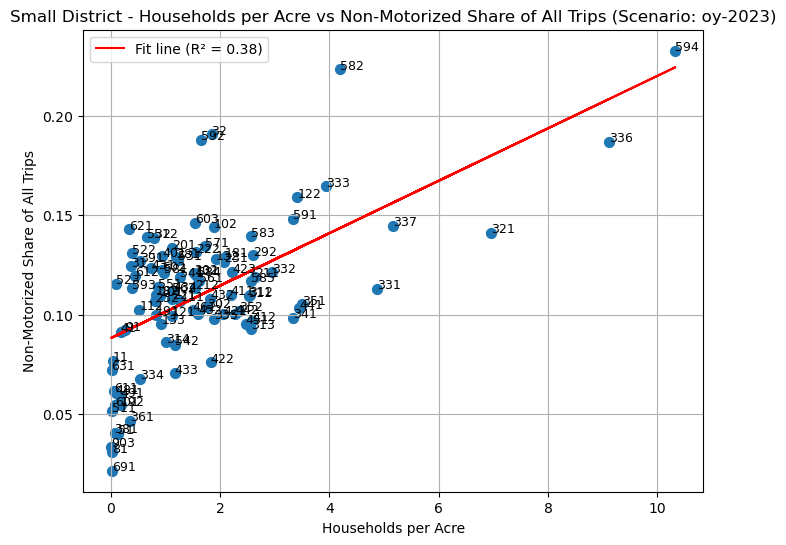

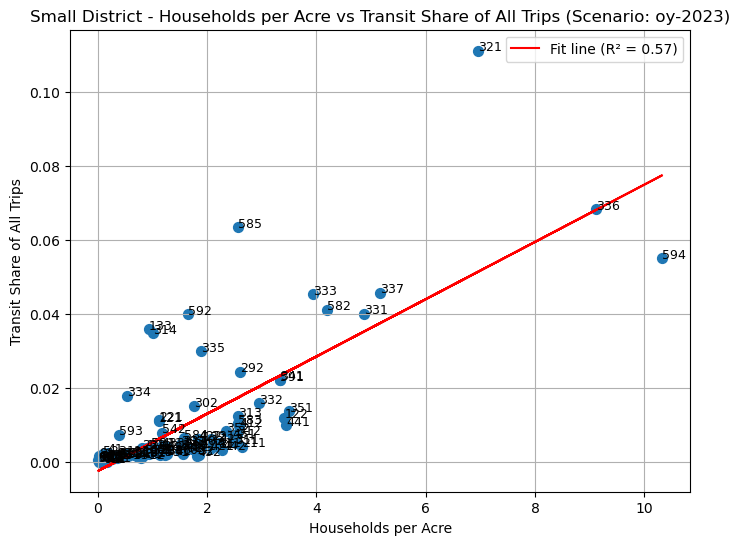

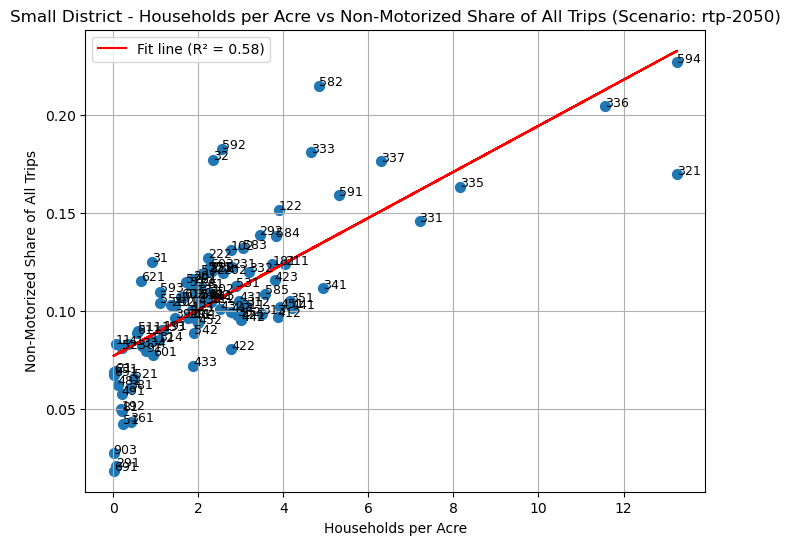

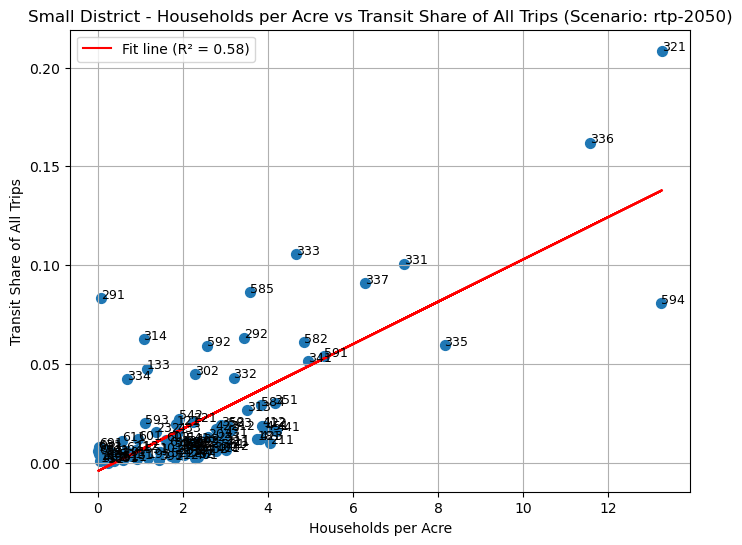

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

filtered_dsml_density_trips_df = dsml_density_trips_df[dsml_density_trips_df['TOTHH'] > 100]

def plot_relationships(df, main_var, main_var_alias, related_vars, related_vars_aliases, label_var, scenario_var):
    # Get unique scenario values
    scenarios = df[scenario_var].unique()
    
    # Loop through each scenario
    for scenario in scenarios:
        # Filter the dataframe for the current scenario
        scenario_data = df[df[scenario_var] == scenario]
        
        # Loop through each related variable
        for related_var, related_vars_alias in zip(related_vars, related_vars_aliases):
            plt.figure(figsize=(8, 6))
            
            # Scatter plot
            plt.scatter(scenario_data[main_var], scenario_data[related_var], s=50)
            
            # Perform linear regression
            X = scenario_data[main_var].values.reshape(-1, 1)
            y = scenario_data[related_var].values
            
            # Fit the model
            model = LinearRegression().fit(X, y)
            y_pred = model.predict(X)
            
            # Calculate R-squared
            r_squared = r2_score(y, y_pred)
            
            # Plot the regression line
            plt.plot(scenario_data[main_var], y_pred, color='red', label=f'Fit line (R² = {r_squared:.2f})')
            
            # Label each point with the DISTSML field
            for i in range(scenario_data.shape[0]):
                plt.text(scenario_data[main_var].iloc[i], scenario_data[related_var].iloc[i], 
                         scenario_data[label_var].iloc[i], fontsize=9)
            
            # Titles and labels
            plt.title(f'Small District - {main_var_alias} vs {related_vars_alias} (Scenario: {scenario})')
            plt.xlabel(main_var_alias)
            plt.ylabel(related_vars_alias)
            plt.legend()
            plt.grid(True)
            plt.show()

# Example usage with a DataFrame (df):
related_vars = ['NonM_pct', 'tTrn_pct']
related_vars_aliases = ['Non-Motorized Share of All Trips', 'Transit Share of All Trips']
plot_relationships(filtered_dsml_density_trips_df, 'hh_per_acre', 'Households per Acre', related_vars, related_vars_aliases, 'DISTSML', 'scenario')


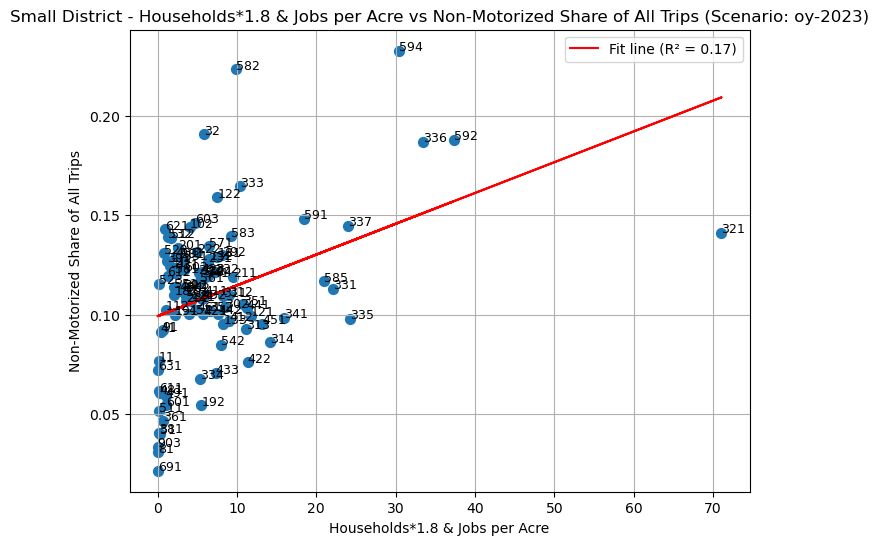

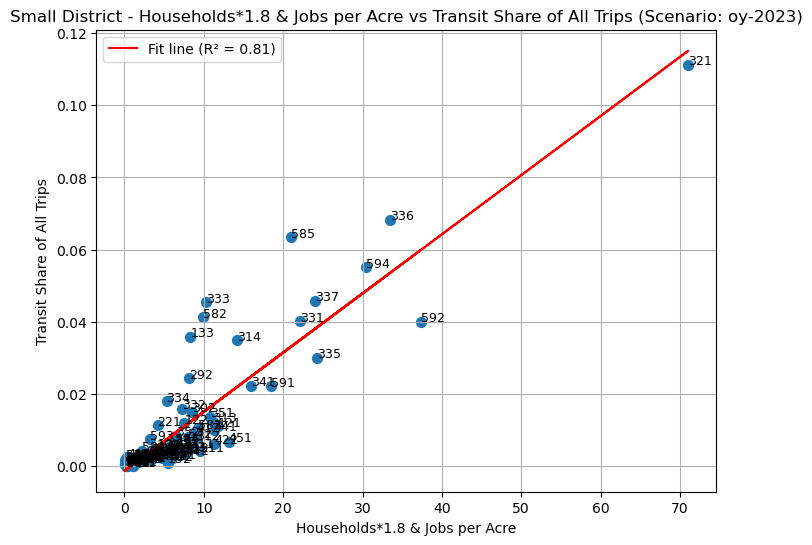

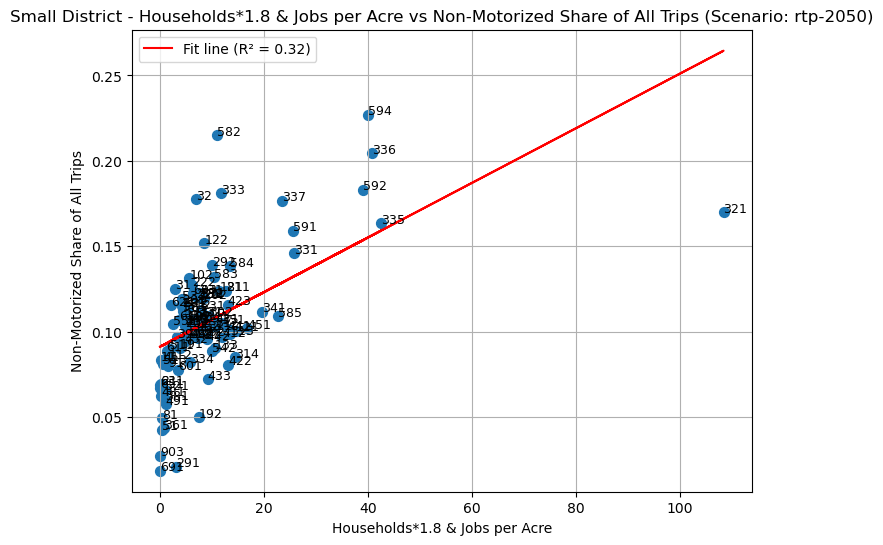

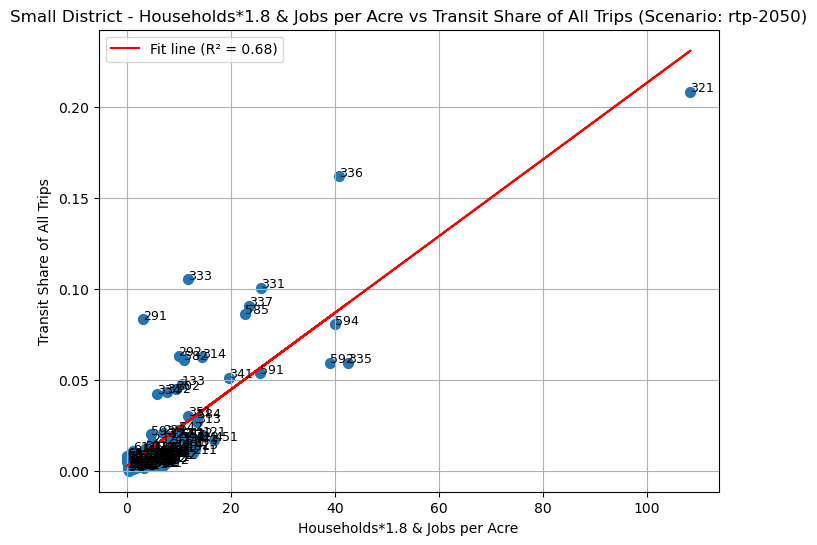

In [125]:
# Example usage with a DataFrame (df):
related_vars = ['NonM_pct', 'tTrn_pct']
related_vars_aliases = ['Non-Motorized Share of All Trips', 'Transit Share of All Trips']
plot_relationships(filtered_dsml_density_trips_df, 'hh_job_per_acre', 'Households*1.8 & Jobs per Acre', related_vars, related_vars_aliases, 'DISTSML', 'scenario')


In [126]:
dsml_density_trips_df[dsml_density_trips_df['DISTSML']==291]

,scenario,DISTSML,DSML_NAME,TOTHH,TOTEMP,DEVACRES,hh_per_acre,hh_job_per_acre,NonM,tTrn,Auto,All,NonM_pct,tTrn_pct,Auto_pct
34,oy-2023,291,Small District 291,60.833333,18350.500000,8384.66945,0.007255,2.201637,1245.56,2652.19,70757.45,74655.17,0.016684,0.035526,0.947790
151,rtp-2050,291,Small District 291,631.500000,24857.333333,8384.66945,0.075316,3.100186,2674.96,10690.25,114890.90,128256.11,0.020856,0.083351,0.895793


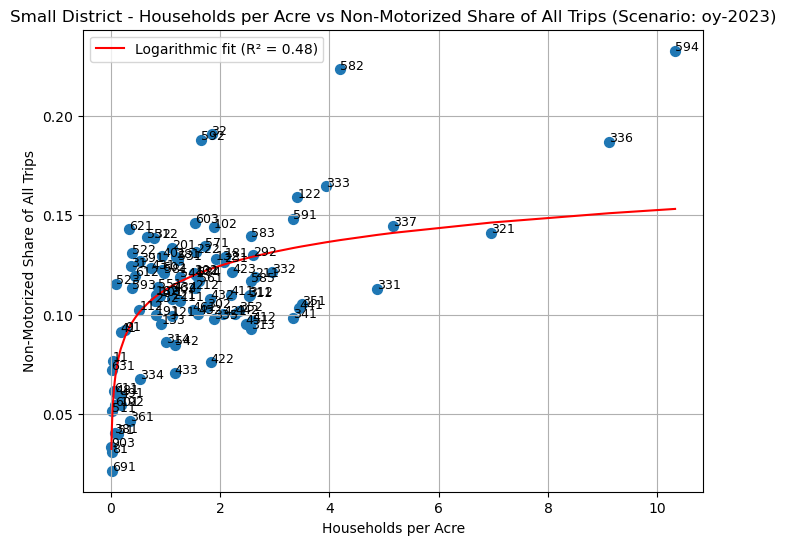

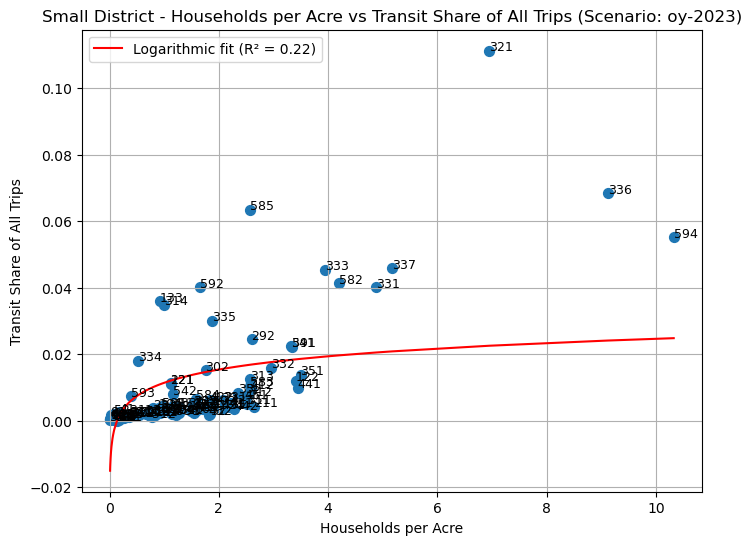

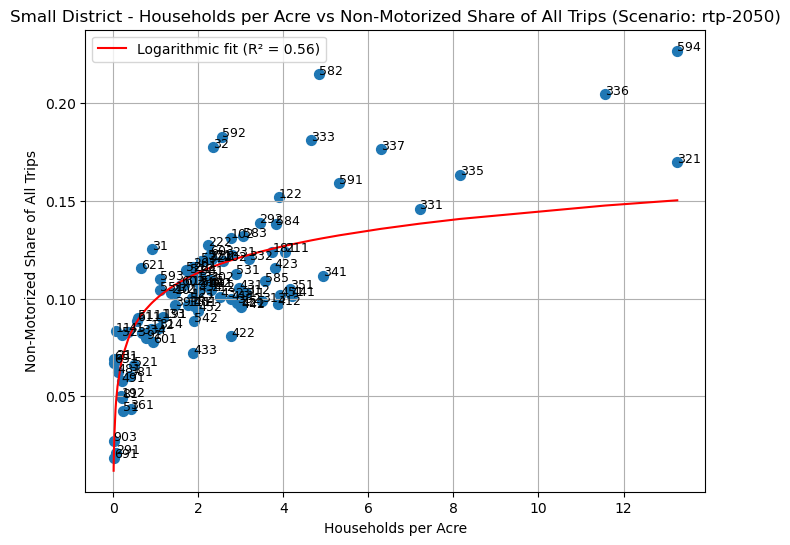

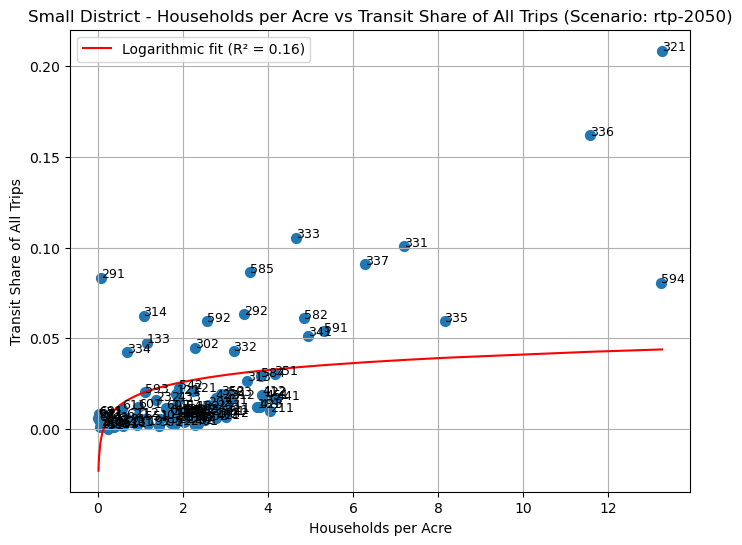

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

filtered_dsml_density_trips_df = dsml_density_trips_df[dsml_density_trips_df['TOTHH'] > 100]

# Logarithmic function
def logarithmic_func(x, a, b):
    return a * np.log(x) + b

def plot_relationships(df, main_var, main_var_alias, related_vars, related_vars_aliases, label_var, scenario_var):
    # Get unique scenario values
    scenarios = df[scenario_var].unique()
    
    # Loop through each scenario
    for scenario in scenarios:
        # Filter the dataframe for the current scenario
        scenario_data = df[df[scenario_var] == scenario]
        
        # Loop through each related variable
        for related_var, related_vars_alias in zip(related_vars, related_vars_aliases):
            plt.figure(figsize=(8, 6))
            
            # Sort the data by the main variable (x-axis)
            scenario_data = scenario_data.sort_values(by=main_var)
            
            # Scatter plot
            plt.scatter(scenario_data[main_var], scenario_data[related_var], s=50)
            
            # Perform logarithmic curve fitting (ignore x <= 0)
            X = scenario_data[main_var].values
            y = scenario_data[related_var].values
            X = X[X > 0]  # log is undefined for non-positive numbers
            y = y[:len(X)]  # Ensure y has the same length as X
            
            # Fit the logarithmic model
            popt, pcov = curve_fit(logarithmic_func, X, y, maxfev=10000)
            a, b = popt
            
            # Predict y values based on the fitted curve
            y_pred = logarithmic_func(X, a, b)
            
            # Calculate R-squared
            r_squared = r2_score(y, y_pred)
            
            # Plot the logarithmic fit curve
            plt.plot(X, y_pred, color='red', label=f'Logarithmic fit (R² = {r_squared:.2f})')
            
            # Label each point with the DISTSML field
            for i in range(scenario_data.shape[0]):
                plt.text(scenario_data[main_var].iloc[i], scenario_data[related_var].iloc[i], 
                         scenario_data[label_var].iloc[i], fontsize=9)
            
            # Titles and labels
            plt.title(f'Small District - {main_var_alias} vs {related_vars_alias} (Scenario: {scenario})')
            plt.xlabel(main_var_alias)
            plt.ylabel(related_vars_alias)
            plt.legend()
            plt.grid(True)
            plt.show()

# Example usage with a DataFrame (df):
related_vars = ['NonM_pct', 'tTrn_pct']
related_vars_aliases = ['Non-Motorized Share of All Trips', 'Transit Share of All Trips']
plot_relationships(filtered_dsml_density_trips_df, 'hh_per_acre', 'Households per Acre', related_vars, related_vars_aliases, 'DISTSML', 'scenario')


In [128]:
#NearTOD6 => High Density (hh_per_acre > 6) and Transit Stop Density (3xrail + 1xbus)
#NearTOD4 => High Density (hh_per_acre > 6) and Transit Stop Density (3xrail + 1xbus)
#Region   => All



In [155]:
dsml_df = taz_gdf.groupby(['DISTSML','DSML_NAME'], as_index=False).agg(DEVACRES=('DEVACRES','sum'))
dsml_df

,DISTSML,DSML_NAME,DEVACRES
0,11,Small District 011,10489.760287
1,21,Small District 021,5079.938865
2,31,Small District 031,6376.928050
3,32,Small District 032,3545.987370
4,41,Small District 041,8108.310421
...,...,...,...
125,903,Small District 903,13872.773610
126,904,Small District 904,0.000000
127,905,Small District 905,0.000000
128,906,Small District 906,3898.348764


In [158]:
import geopandas as gpd

# Read the stops data
stops_with_max_mode_gdf = gpd.read_file('results/stops_with_max_mode.geojson')
stops_with_max_mode_gdf

,STOPID,TAZID,DISTSML,DISTMED,DISTLRG,DISTSUPER,DSUP_NAME,CITY_NAME,PLANAREA,SUBAREAID,scenario,MaxMode,Boardings,geometry
0,424680_4497040,1803.0,441.0,44.0,17.0,6.0,Salt Lake County,Midvale,WFRC,1.0,rtp-2050,4,415.70,POINT (-111.89049 40.62076)
1,437580_4462640,2811.0,584.0,58.0,21.0,7.0,Utah County,Orem,MAG,1.0,rtp-2050,4,10.73,POINT (-111.73461 40.31195)
2,438320_4462620,2811.0,584.0,58.0,21.0,7.0,Utah County,Orem,MAG,1.0,rtp-2050,4,9.52,POINT (-111.72590 40.31182)
3,438580_4462620,2836.0,583.0,58.0,21.0,7.0,Utah County,Orem,MAG,1.0,rtp-2050,4,62.55,POINT (-111.72284 40.31184)
4,439240_4462640,2812.0,583.0,58.0,21.0,7.0,Utah County,Orem,MAG,1.0,rtp-2050,4,279.66,POINT (-111.71507 40.31207)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,424220_4501380,1633.0,341.0,34.0,14.0,6.0,Salt Lake County,Murray,WFRC,1.0,oy-2023,6,1464.48,POINT (-111.89645 40.65981)
319,424220_4501380,1633.0,341.0,34.0,14.0,6.0,Salt Lake County,Murray,WFRC,1.0,rtp-2050,6,6729.42,POINT (-111.89645 40.65981)
320,413240_4490620,1967.0,423.0,42.0,16.0,6.0,Salt Lake County,South Jordan,WFRC,1.0,oy-2023,5,3.37,POINT (-112.02484 40.56181)
321,413240_4490620,1967.0,423.0,42.0,16.0,6.0,Salt Lake County,South Jordan,WFRC,1.0,rtp-2050,5,121.93,POINT (-112.02484 40.56181)


In [159]:
# Assuming stop_taz_df is your dataframe and 'MaxMode' is the relevant column
def assign_values(row):
    if row['MaxMode'] in [7, 8]:
        return 3
    elif row['MaxMode'] != 0:
        return 1
    else:
        return 0

# Apply the function to the dataframe
stops_with_max_mode_gdf['mode_weight'] = stops_with_max_mode_gdf.apply(assign_values, axis=1)

# Display the updated dataframe
display(stops_with_max_mode_gdf.head())

,STOPID,TAZID,DISTSML,DISTMED,DISTLRG,DISTSUPER,DSUP_NAME,CITY_NAME,PLANAREA,SUBAREAID,scenario,MaxMode,Boardings,geometry,mode_weight
0,424680_4497040,1803.0,441.0,44.0,17.0,6.0,Salt Lake County,Midvale,WFRC,1.0,rtp-2050,4,415.70,POINT (-111.89049 40.62076),1
1,437580_4462640,2811.0,584.0,58.0,21.0,7.0,Utah County,Orem,MAG,1.0,rtp-2050,4,10.73,POINT (-111.73461 40.31195),1
2,438320_4462620,2811.0,584.0,58.0,21.0,7.0,Utah County,Orem,MAG,1.0,rtp-2050,4,9.52,POINT (-111.72590 40.31182),1
3,438580_4462620,2836.0,583.0,58.0,21.0,7.0,Utah County,Orem,MAG,1.0,rtp-2050,4,62.55,POINT (-111.72284 40.31184),1
4,439240_4462640,2812.0,583.0,58.0,21.0,7.0,Utah County,Orem,MAG,1.0,rtp-2050,4,279.66,POINT (-111.71507 40.31207),1


In [163]:
stop_dsml_df = stops_with_max_mode_gdf.groupby(['scenario','DISTSML'], as_index=False).agg(mode_weight_sum=('mode_weight','sum'))
stop_dsml_df

,scenario,DISTSML,mode_weight_sum
0,oy-2023,111.0,1
1,oy-2023,121.0,6
2,oy-2023,122.0,7
3,oy-2023,132.0,3
4,oy-2023,133.0,1
...,...,...,...
76,rtp-2050,593.0,1
77,rtp-2050,594.0,5
78,rtp-2050,601.0,1
79,rtp-2050,602.0,1


In [164]:
stop_dsml_density_df = pd.merge(stop_dsml_df, dsml_df, on='DISTSML')
stop_dsml_density_df['mode_weight_sum_per_acre'] = stop_dsml_density_df['mode_weight_sum'] / stop_dsml_density_df['DEVACRES']
stop_dsml_density_df


,scenario,DISTSML,mode_weight_sum,DSML_NAME,DEVACRES,mode_weight_sum_per_acre
0,oy-2023,111.0,1,Small District 111,11069.480305,0.000090
1,rtp-2050,111.0,1,Small District 111,11069.480305,0.000090
2,oy-2023,121.0,6,Small District 121,4330.601390,0.001385
3,rtp-2050,121.0,6,Small District 121,4330.601390,0.001385
4,oy-2023,122.0,7,Small District 122,3961.292796,0.001767
...,...,...,...,...,...,...
76,rtp-2050,581.0,1,Small District 581,5051.652204,0.000198
77,rtp-2050,592.0,1,Small District 592,500.851119,0.001997
78,rtp-2050,601.0,1,Small District 601,10388.930054,0.000096
79,rtp-2050,602.0,1,Small District 602,15207.054159,0.000066


In [169]:
stop_dsml_density_df.describe()

,DISTSML,mode_weight_sum,DEVACRES,mode_weight_sum_per_acre
count,81.000000,81.000000,81.000000,81.000000
mean,388.703704,3.987654,5448.225587,0.002074
std,160.645763,4.956041,4146.357659,0.003482
min,111.000000,1.000000,107.681660,0.000043
25%,292.000000,1.000000,2386.235616,0.000239
50%,341.000000,2.000000,4522.560908,0.000602
75%,562.000000,5.000000,8309.755801,0.001895
max,611.000000,35.000000,23000.317563,0.020991


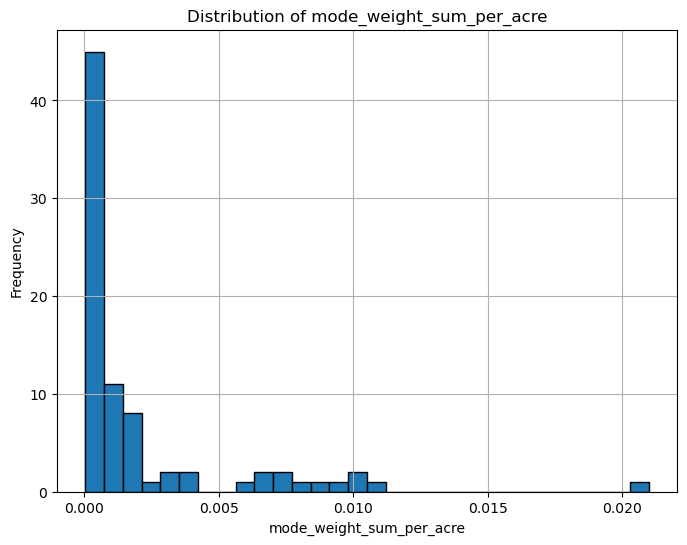

In [173]:
import matplotlib.pyplot as plt

# Assuming stop_dsml_df is your DataFrame with the field 'mode_weight_sum_per_acre'
def plot_histogram(df, field, bins=30):
    plt.figure(figsize=(8, 6))
    plt.hist(df[field], bins=bins, edgecolor='black')
    plt.title(f'Distribution of {field}')
    plt.xlabel(field)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Example usage
plot_histogram(stop_dsml_density_df, 'mode_weight_sum_per_acre')




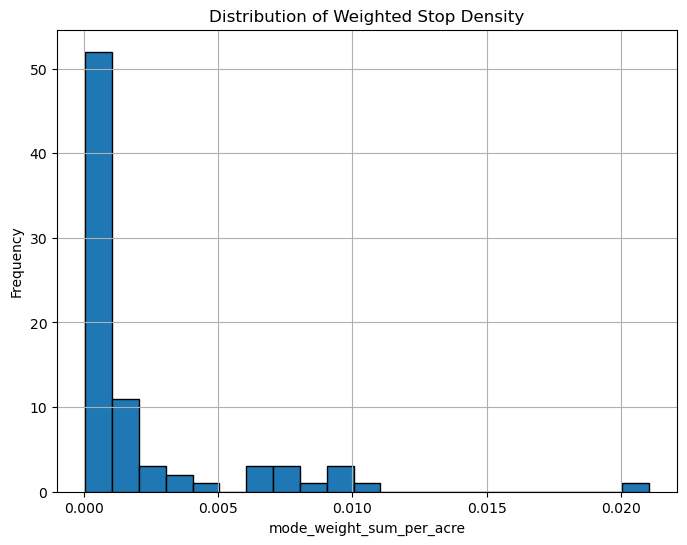

In [176]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming stop_dsml_df is your DataFrame with the field 'mode_weight_sum_per_acre'
def plot_histogram(df, field, bin_size=0.001):
    # Define the bin edges based on the minimum and maximum values of the field
    min_value = df[field].min()
    max_value = df[field].max()
    bins = np.arange(min_value, max_value + bin_size, bin_size)  # Create bins with a width of 0.02
    
    plt.figure(figsize=(8, 6))
    plt.hist(df[field], bins=bins, edgecolor='black')
    plt.title(f'Distribution of Weighted Stop Density')
    plt.xlabel(field)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Example usage
plot_histogram(stop_dsml_density_df, 'mode_weight_sum_per_acre', bin_size=0.001)


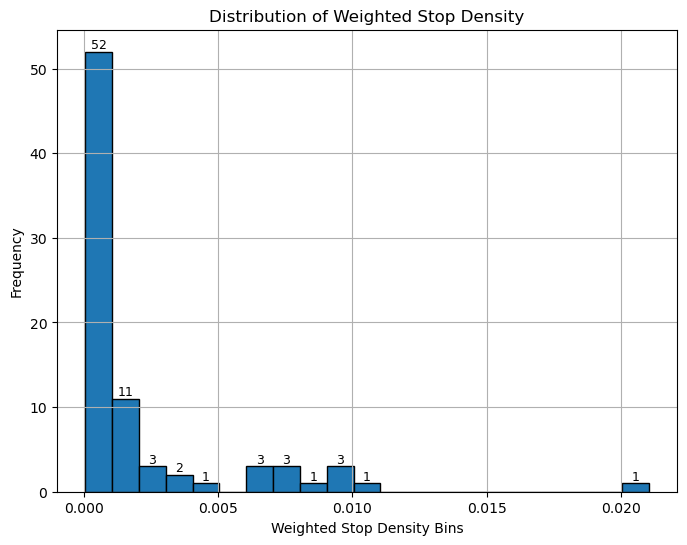

In [178]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming stop_dsml_df is your DataFrame with the field 'mode_weight_sum_per_acre'
def plot_histogram(df, field, bin_size=0.001):
    # Define the bin edges based on the minimum and maximum values of the field
    min_value = df[field].min()
    max_value = df[field].max()
    bins = np.arange(min_value, max_value + bin_size, bin_size)  # Create bins with a width of 0.02
    
    plt.figure(figsize=(8, 6))
    
    # Capture the histogram data
    counts, bins, patches = plt.hist(df[field], bins=bins, edgecolor='black')
    
    # Label each bar with its frequency
    for count, patch in zip(counts, patches):
        if count > 0:  # Only label non-zero counts
            height = patch.get_height()
            plt.text(patch.get_x() + patch.get_width() / 2, height, f'{int(count)}', 
                     ha='center', va='bottom', fontsize=9)


    plt.title(f'Distribution of Weighted Stop Density')
    plt.xlabel('Weighted Stop Density Bins')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Example usage
plot_histogram(stop_dsml_density_df, 'mode_weight_sum_per_acre', bin_size=0.001)


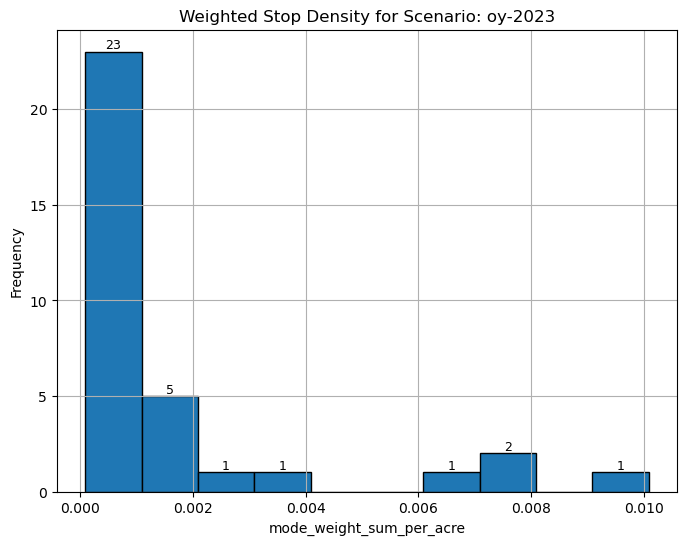

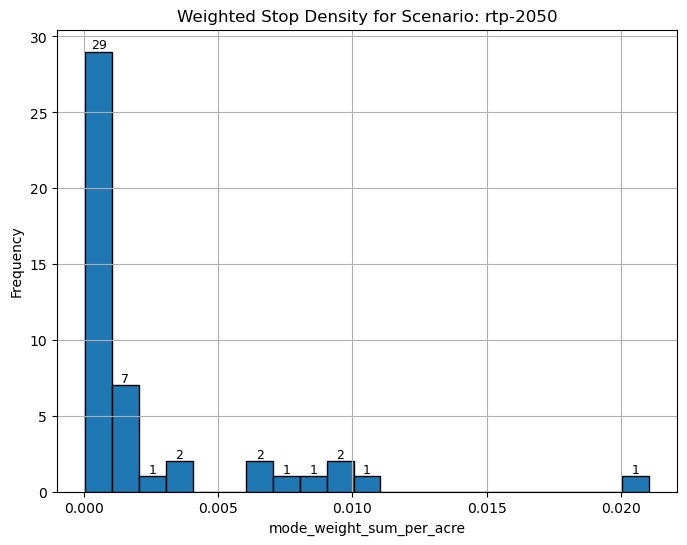

In [181]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming stop_dsml_df is your DataFrame with the field 'mode_weight_sum_per_acre' and 'scenario'
def plot_histograms_by_scenario(df, field, scenario_field, bin_size=0.001):
    # Get the unique scenarios
    scenarios = df[scenario_field].unique()
    
    # Loop through each scenario
    for scenario in scenarios:
        # Filter the dataframe for the current scenario
        scenario_data = df[df[scenario_field] == scenario]
        
        # Define the bin edges based on the minimum and maximum values of the field
        min_value = scenario_data[field].min()
        max_value = scenario_data[field].max()
        bins = np.arange(min_value, max_value + bin_size, bin_size)  # Create bins with a specified bin width
        
        plt.figure(figsize=(8, 6))
        
        # Capture the histogram data
        counts, bins, patches = plt.hist(scenario_data[field], bins=bins, edgecolor='black')
        
        # Label each bar with its frequency if the count is not zero
        for count, patch in zip(counts, patches):
            if count > 0:  # Only label non-zero counts
                height = patch.get_height()
                plt.text(patch.get_x() + patch.get_width() / 2, height, f'{int(count)}', 
                         ha='center', va='bottom', fontsize=9)
        
        # Titles and labels
        plt.title(f'Weighted Stop Density for Scenario: {scenario}')
        plt.xlabel(field)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

# Example usage
plot_histograms_by_scenario(stop_dsml_density_df, 'mode_weight_sum_per_acre', 'scenario', bin_size=0.001)


## Use 0.005 as cutoff

In [ ]:
#NearTOD6 => High Density (hh_per_acre > 6) and Transit Stop Density (3xrail + 1xbus) > 0.005
#NearTOD4 => High Density (hh_per_acre > 6) and Transit Stop Density (3xrail + 1xbus) > 0.005
#Region   => All

In [185]:
filtered_dsml_density_trips_df = dsml_density_trips_df[dsml_density_trips_df['TOTHH'] > 100]
filtered_dsml_density_trips_df

,scenario,DISTSML,DSML_NAME,TOTHH,TOTEMP,DEVACRES,hh_per_acre,hh_job_per_acre,NonM,tTrn,Auto,All,NonM_pct,tTrn_pct,Auto_pct
0,oy-2023,11,Small District 011,374.5,568.2,10489.760287,0.035701,0.118430,475.43,3.51,5718.11,6197.05,0.076719,0.000566,0.922715
2,oy-2023,31,Small District 031,2391.5,5887.7,6376.928050,0.375024,1.598324,6629.48,84.78,46580.55,53294.69,0.124393,0.001591,0.874019
3,oy-2023,32,Small District 032,6531.2,8942.1,3545.987370,1.841857,5.837094,21042.52,222.15,89041.91,110306.62,0.190764,0.002014,0.807222
4,oy-2023,41,Small District 041,1458.0,433.1,8108.310421,0.179816,0.377082,1776.25,49.48,17596.86,19422.57,0.091453,0.002548,0.906001
5,oy-2023,51,Small District 051,396.5,166.0,2928.423138,0.135397,0.300401,226.15,0.04,5429.70,5655.91,0.039985,0.000007,0.960005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,rtp-2050,621,Small District 621,18450.0,26528.0,27920.479563,0.660805,2.139576,43489.05,2266.78,330461.59,376217.37,0.115596,0.006025,0.878379
224,rtp-2050,631,Small District 631,438.0,344.0,35054.565458,0.012495,0.032304,528.53,56.56,7085.08,7670.15,0.068907,0.007374,0.923721
226,rtp-2050,651,Small District 651,198.0,0.0,10259.408185,0.019299,0.034739,178.82,12.27,2469.87,2660.99,0.067201,0.004611,0.928177
229,rtp-2050,691,Small District 691,126.0,2.0,4683.335496,0.026904,0.048854,25.45,11.10,1333.64,1370.19,0.018574,0.008101,0.973325


In [204]:
filtered_dsml_density_trips_stops_df = pd.merge(filtered_dsml_density_trips_df[['scenario','DISTSML','DSML_NAME','NonM','tTrn','Auto','All','hh_per_acre']], stop_dsml_density_df[['scenario','DISTSML','mode_weight_sum_per_acre']], on=(['scenario','DISTSML']))
filtered_dsml_density_trips_stops_df

,scenario,DISTSML,DSML_NAME,NonM,tTrn,Auto,All,hh_per_acre,mode_weight_sum_per_acre
0,oy-2023,111,Small District 111,26141.03,1022.45,217163.01,244326.49,1.270023,0.000090
1,oy-2023,121,Small District 121,22352.68,2486.41,200008.21,224847.28,1.118205,0.001385
2,oy-2023,122,Small District 122,27186.47,2049.53,141590.53,170826.51,3.414416,0.001767
3,oy-2023,132,Small District 132,16264.94,745.67,110307.99,127318.62,1.919237,0.000770
4,oy-2023,133,Small District 133,5443.88,2046.10,49517.08,57007.05,0.926113,0.001895
...,...,...,...,...,...,...,...,...,...
72,rtp-2050,593,Small District 593,2288.77,419.97,18102.82,20811.57,1.104749,0.000947
73,rtp-2050,594,Small District 594,22977.45,8165.43,70123.77,101266.65,13.246472,0.009931
74,rtp-2050,601,Small District 601,14165.45,2154.81,166200.34,182520.61,0.940520,0.000096
75,rtp-2050,602,Small District 602,47030.90,5032.91,386874.46,438938.25,1.595444,0.000066


In [275]:
# Assuming stop_taz_df is your dataframe and 'MaxMode' is the relevant column
def assign_hh_density_category(row):
    if row['hh_per_acre'] > 6:
        return ['HH>6upa', 'HH>4upa', 'All HH']
    elif row['hh_per_acre'] > 4:
        return ['HH>4upa', 'All HH']
    else:
        return ['All HH']
    
# Assuming stop_taz_df is your dataframe and 'MaxMode' is the relevant column
def assign_stop_density_category(row):
    if row['mode_weight_sum_per_acre'] > 0.005:
        return ['High Transit', 'All Transit']
    else:
        return ['All Transit']

# Apply the function to the dataframe
filtered_dsml_density_trips_stops_df['hh_density_category'] = filtered_dsml_density_trips_stops_df.apply(assign_hh_density_category, axis=1)
filtered_dsml_density_trips_stops_df['stop_density_category'] = filtered_dsml_density_trips_stops_df.apply(assign_stop_density_category, axis=1)

filtered_dsml_density_trips_stops_df

,scenario,DISTSML,DSML_NAME,NonM,tTrn,Auto,All,hh_per_acre,mode_weight_sum_per_acre,hh_density_category,stop_density_category
0,oy-2023,111,Small District 111,26141.03,1022.45,217163.01,244326.49,1.270023,0.000090,[All HH],[All Transit]
1,oy-2023,121,Small District 121,22352.68,2486.41,200008.21,224847.28,1.118205,0.001385,[All HH],[All Transit]
2,oy-2023,122,Small District 122,27186.47,2049.53,141590.53,170826.51,3.414416,0.001767,[All HH],[All Transit]
3,oy-2023,132,Small District 132,16264.94,745.67,110307.99,127318.62,1.919237,0.000770,[All HH],[All Transit]
4,oy-2023,133,Small District 133,5443.88,2046.10,49517.08,57007.05,0.926113,0.001895,[All HH],[All Transit]
...,...,...,...,...,...,...,...,...,...,...,...
72,rtp-2050,593,Small District 593,2288.77,419.97,18102.82,20811.57,1.104749,0.000947,[All HH],[All Transit]
73,rtp-2050,594,Small District 594,22977.45,8165.43,70123.77,101266.65,13.246472,0.009931,"[HH>6upa, HH>4upa, All HH]","[High Transit, All Transit]"
74,rtp-2050,601,Small District 601,14165.45,2154.81,166200.34,182520.61,0.940520,0.000096,[All HH],[All Transit]
75,rtp-2050,602,Small District 602,47030.90,5032.91,386874.46,438938.25,1.595444,0.000066,[All HH],[All Transit]


In [276]:
exploded_df = filtered_dsml_density_trips_stops_df.drop(columns=(['hh_per_acre','mode_weight_sum_per_acre','DISTSML','DSML_NAME'])).explode('hh_density_category').explode('stop_density_category')
exploded_df

,scenario,NonM,tTrn,Auto,All,hh_density_category,stop_density_category
0,oy-2023,26141.03,1022.45,217163.01,244326.49,All HH,All Transit
1,oy-2023,22352.68,2486.41,200008.21,224847.28,All HH,All Transit
2,oy-2023,27186.47,2049.53,141590.53,170826.51,All HH,All Transit
3,oy-2023,16264.94,745.67,110307.99,127318.62,All HH,All Transit
4,oy-2023,5443.88,2046.10,49517.08,57007.05,All HH,All Transit
...,...,...,...,...,...,...,...
73,rtp-2050,22977.45,8165.43,70123.77,101266.65,All HH,High Transit
73,rtp-2050,22977.45,8165.43,70123.77,101266.65,All HH,All Transit
74,rtp-2050,14165.45,2154.81,166200.34,182520.61,All HH,All Transit
75,rtp-2050,47030.90,5032.91,386874.46,438938.25,All HH,All Transit


In [277]:
summary_df = exploded_df.groupby(['scenario','hh_density_category','stop_density_category'], as_index=False).sum()
summary_df = summary_df.set_index(['scenario','hh_density_category','stop_density_category'])
summary_df['Non-Motorized'] = summary_df['NonM'] / summary_df['All']
summary_df['Transit'      ] = summary_df['tTrn'] / summary_df['All']
summary_df['Auto'         ] = summary_df['Auto'] / summary_df['All']
summary_df.drop(columns=(['NonM','tTrn','All']), inplace=True)
summary_df

Auto  Non-Motorized  \
scenario hh_density_category stop_density_category                            
oy-2023  All HH              All Transit            0.860569       0.118618   
                             High Transit           0.740891       0.160888   
         HH>4upa             All Transit            0.773520       0.151137   
                             High Transit           0.740891       0.160888   
         HH>6upa             All Transit            0.742122       0.165359   
                             High Transit           0.741200       0.157502   
rtp-2050 All HH              All Transit            0.841229       0.119560   
                             High Transit           0.655974       0.175319   
         HH>4upa             All Transit            0.754377       0.148457   
                             High Transit           0.635568       0.184420   
         HH>6upa             All Transit            0.673425       0.172669   
                             High Transit           0.633159       0.183587   

                                                     Transit  
scenario hh_density_category stop_density_category            
oy-2023  All HH              All Transit            0.020813  
                             High Transit           0.098221  
         HH>4upa             All Transit            0.075344  
                             High Transit           0.098221  
         HH>6upa             All Transit            0.092519  
                             High Transit           0.101298  
rtp-2050 All HH              All Transit            0.039210  
                             High Transit           0.168707  
         HH>4upa             All Transit            0.097166  
                             High Transit           0.180011  
         HH>6upa             All Transit            0.153906  
                             High Transit           0.183254

In [278]:
exploded_df

,scenario,NonM,tTrn,Auto,All,hh_density_category,stop_density_category
0,oy-2023,26141.03,1022.45,217163.01,244326.49,All HH,All Transit
1,oy-2023,22352.68,2486.41,200008.21,224847.28,All HH,All Transit
2,oy-2023,27186.47,2049.53,141590.53,170826.51,All HH,All Transit
3,oy-2023,16264.94,745.67,110307.99,127318.62,All HH,All Transit
4,oy-2023,5443.88,2046.10,49517.08,57007.05,All HH,All Transit
...,...,...,...,...,...,...,...
73,rtp-2050,22977.45,8165.43,70123.77,101266.65,All HH,High Transit
73,rtp-2050,22977.45,8165.43,70123.77,101266.65,All HH,All Transit
74,rtp-2050,14165.45,2154.81,166200.34,182520.61,All HH,All Transit
75,rtp-2050,47030.90,5032.91,386874.46,438938.25,All HH,All Transit


In [284]:
# Group by and get the sum, then also get the count of records
summary_df = exploded_df.groupby(['scenario', 'hh_density_category', 'stop_density_category'], as_index=False).agg(
    NonM=('NonM', 'sum'), 
    tTrn=('tTrn', 'sum'), 
    Auto=('Auto', 'sum'), 
    All=('All', 'sum'), 
    Dist_Count=('scenario', 'size')  # Count the number of records for each group
)

# Set the index
summary_df = summary_df.set_index(['scenario', 'hh_density_category', 'stop_density_category'])

# Calculate proportions
summary_df['Non-Motorized'] = summary_df['NonM'] / summary_df['All']
summary_df['Transit'] = summary_df['tTrn'] / summary_df['All']
summary_df['Auto'] = summary_df['Auto'] / summary_df['All']

# Drop unnecessary columns
summary_df.drop(columns=(['NonM', 'tTrn', 'All']), inplace=True)

# Display summary_df
display(summary_df[['Dist_Count']])



Dist_Count
scenario hh_density_category stop_density_category            
oy-2023  All HH              All Transit                    32
                             High Transit                    3
         HH>4upa             All Transit                     5
                             High Transit                    3
         HH>6upa             All Transit                     3
                             High Transit                    2
rtp-2050 All HH              All Transit                    45
                             High Transit                    6
         HH>4upa             All Transit                    11
                             High Transit                    5
         HH>6upa             All Transit                     6
                             High Transit                    4

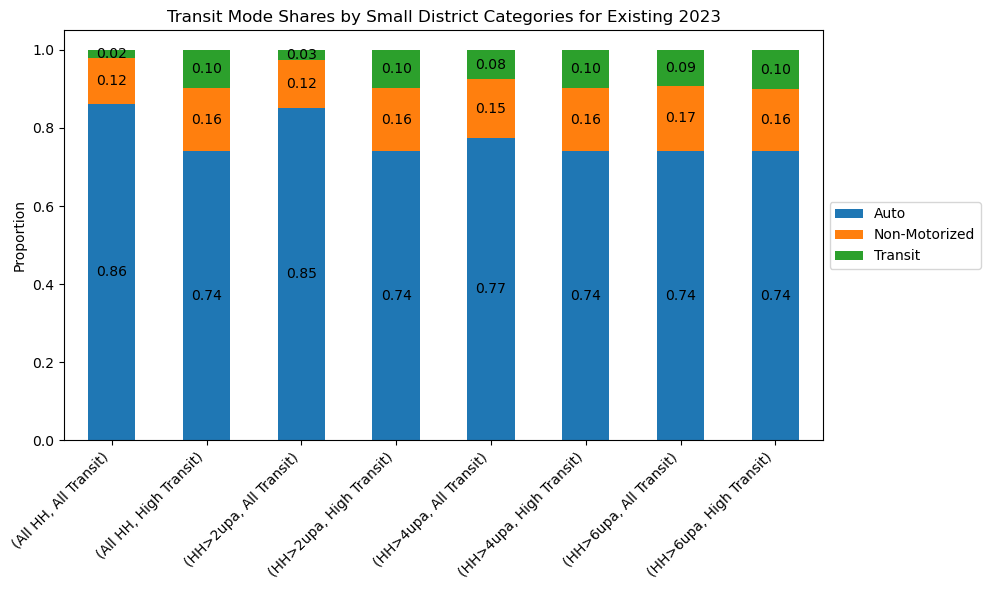

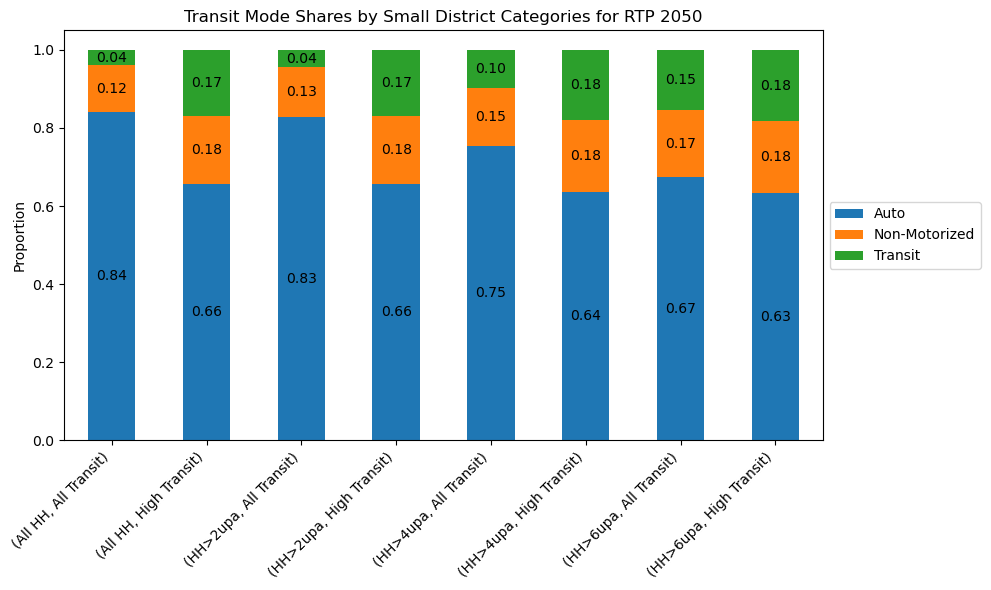

In [270]:
import matplotlib.pyplot as plt

def plot_stacked_bar_chart_with_labels(summary_df):
    # Reset the index to plot the categories
    summary_df = summary_df.reset_index()

    # Create a pivot table to prepare data for stacked bar chart
    pivot_df = summary_df.pivot_table(index=['scenario', 'hh_density_category', 'stop_density_category'],
                                      values=['Non-Motorized', 'Transit', 'Auto'])
    
    # Plotting each scenario as a separate stacked bar chart
    for scenario in summary_df['scenario'].unique():
        scenario_data = pivot_df.xs(scenario, level='scenario')

        # Custom title based on scenario
        if scenario == 'oy-2023':
            title = 'Existing 2023'
        elif scenario == 'rtp-2050':
            title = 'RTP 2050'
        else:
            title = scenario  # Default to the scenario name if not matched

        ax = scenario_data.plot(kind='bar', stacked=True, figsize=(10, 6))
        
        # Move the legend outside of the plot
        plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

        # Add data labels on top of the bars
        for p in ax.patches:
            width = p.get_width()
            height = p.get_height()
            x = p.get_x()
            y = p.get_y()
            
            if height > 0:  # Label only if there is a value
                ax.text(x + width / 2, y + height / 2, f'{height:.2f}', ha='center', va='center')

        plt.title(f'Transit Mode Shares by Small District Categories for {title}')
        plt.xlabel('')
        plt.ylabel('Proportion')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Example usage
plot_stacked_bar_chart_with_labels(summary_df)

